# Executive summary

- The distribution of each binary features is not 1 to 1 which means the dataset is biased.
    - The number of surviving patients is greater than deceased patients
- The DEATH_EVENT, a target variable, is not evenly distributed which means we have a imbalanced dataset. We have take this into consider when splitting our data and training the model.

The correlation heatmap showed:
- There is positive correlation between serum_creatinine and death event & age and death event
- There is negative correlation between time and death event
- There is negative correlation between serum_sodium and death event & ejection_fraction and death event

Age
- The majority of the patients age is around 50 to 70.
- The younger patients are more likely to survive

Serum Creatinine
- The survivors serum creatinine level is around the median 1.0
- The deceased patients serum creatinine level are ofter higher than 1.3

Ejection fraction
- The deceased patients ejection fraction level are mostly lower than surviving patients

Serum sodium 
- The serum sodium level is very wide for deceased patients while the level for survivors are around the median

Time
- The deceased patients tend to have less follow up time compared to surviving patients follow up time

Feature Selection: Age, Serum_creatinine, Ejection_fraction, Time, Serum_sodium 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned.csv")
df.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
160,66,1,72,0,40,1,242000.00,1.20,134,1,0,121,0
265,50,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
148,75,1,582,0,30,0,225000.00,1.83,134,1,0,113,1
220,73,0,582,0,20,0,263358.03,1.83,134,1,0,198,1
159,59,1,129,0,45,1,362000.00,1.10,139,1,1,121,0


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

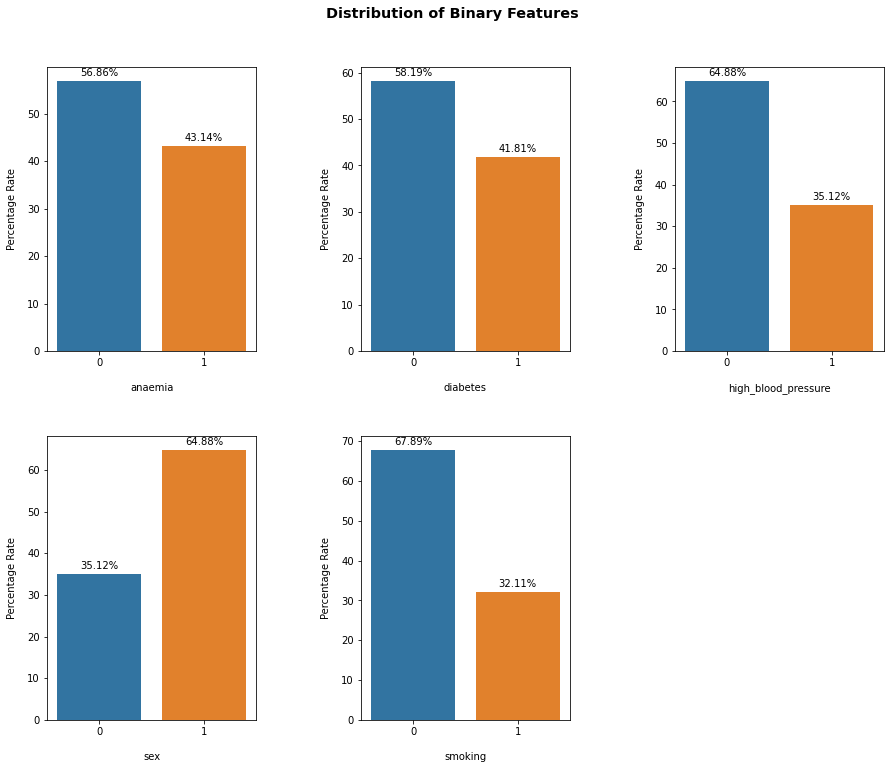

In [13]:
binary_features=["anaemia","diabetes","high_blood_pressure","sex","smoking"]

counter = 1
plt.figure(figsize = (15, 12))
for feature in binary_features:
        
    series = round(((df[feature].value_counts(dropna = False))/
                    (len(df[feature])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(feature, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)
    counter += 1
    for p in ax.patches:
        y_value = p.get_height()
        x_value = p.get_x() + p.get_width() / 2

        space = 3
        va = 'bottom'

        label = "{:.2f}%".format(y_value)

        plt.annotate(
            label,                       
            (x_value, y_value),           
            xytext = (0, space),          
            textcoords = "offset points", 
            ha = 'center',                
            va = va)                      
    
plt.suptitle("Distribution of Binary Features",y=.95, size='x-large',weight='bold')
plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

- The distribution of each binary features is not 1 to 1 which means the dataset is biased.
    - The number of male patients is greater than female patients
    - The number of non smokers is greater than  smokers
    - The number of patients who do not have anaemia,diabetes, and high blood pressure is greater than those who have these conditions
    - The number of surviving patients is greater than deceased patients

Text(0.5, 0.95, 'Distribution of Target Variable')

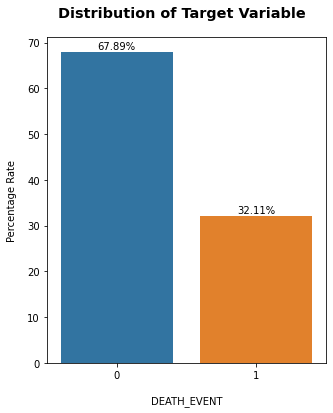

In [34]:
plt.figure(figsize = (5, 6))
series = round(((df["DEATH_EVENT"].value_counts(dropna = False))/
                    (len(df["DEATH_EVENT"])) * 100), 2)
ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("DEATH_EVENT", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

for p in ax.patches:
    y_value = p.get_height()
    x_value = p.get_x() + p.get_width() / 2

    space = 1
    va = 'bottom'

    label = "{:.2f}%".format(y_value)

    plt.annotate(
                label,                       
                (x_value, y_value),           
                xytext = (0, space),          
                textcoords = "offset points", 
                ha = 'center',                
                va = va)  
plt.suptitle("Distribution of Target Variable",y=.95, size='x-large',weight='bold')

- The DEATH_EVENT, a target variable, is not evenly distributed which means we have a imbalanced dataset. We have take this into consider when splitting our data and training the model.

Text(0.5, 1.04, 'Age distribution by Gender [0(F),1(M)]')

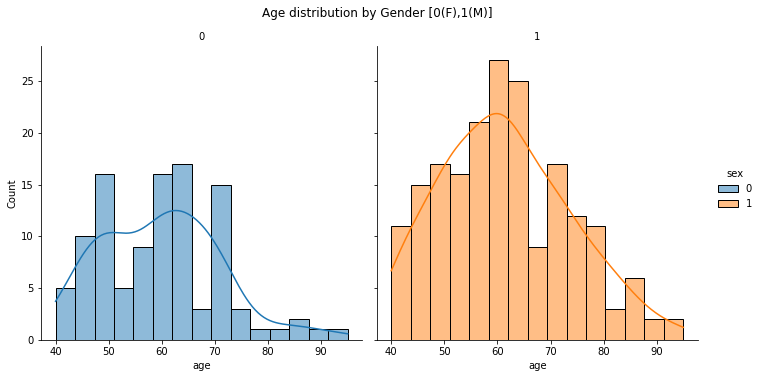

In [25]:
age_sex= sns.displot(data=df, x="age",hue="sex", col="sex",kde=True,bins=15)
age_sex.set_titles("{col_name}")
age_sex.fig.suptitle("Age distribution by Gender [0(F),1(M)]",y=1.04)

- The age group of the patients ranges from 40 - 95 with visible spike in the population density at 60-62 age interval.

Text(0.5, 1.0, 'Correlation Heatmap')

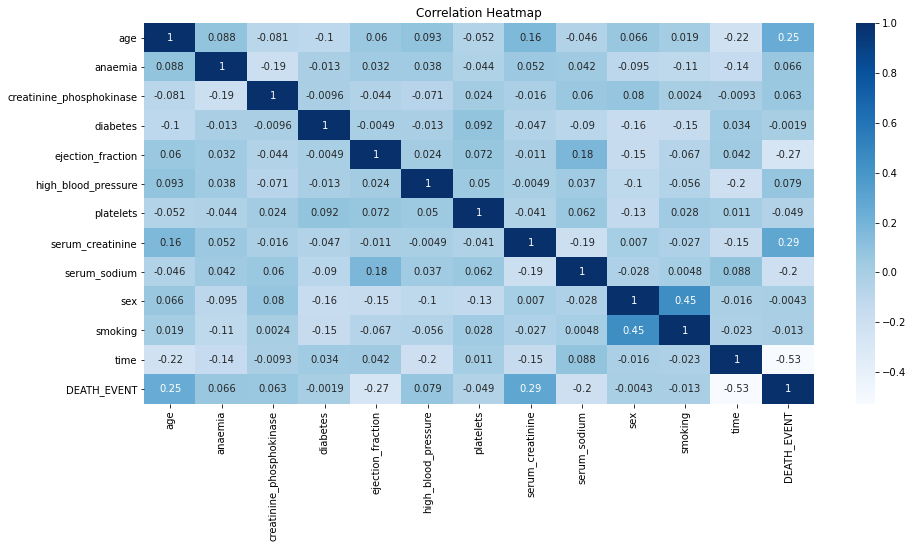

In [35]:
plt.figure(figsize=(15, 7))
heatmap=sns.heatmap(df.corr(),annot=True,cmap="Blues")
heatmap.set_title('Correlation Heatmap')

- There is positive correlation between serum_creatinine and death event & age and death event
- There is negative correlation between serum_sodium and death event & ejection_fraction and death event
- There is negative correlation between time and death event
- There is positive correlation between sex and smokinng

### In the following analysis, we will primarly look at features which are significantly correlated with the target variable, death_event

## Age

In [36]:
df['age'].describe()

count    299.000000
mean      60.829431
std       11.894997
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Age distribution')

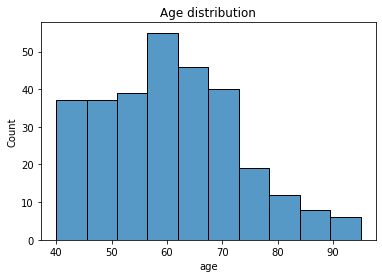

In [37]:
age_hist=sns.histplot(data=df,x="age",palette="Blues")
age_hist.set_title("Age distribution")

Text(0.5, 1.0, 'Age distribution')

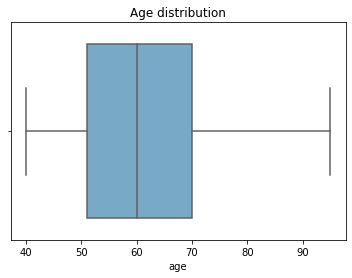

In [38]:
age_box=sns.boxplot(data=df,x="age",palette="Blues")
age_box.set_title("Age distribution")

- The median age is 60 which is less the mean age of 60.829431. The age distribution is slighty skewed to the right
- The majority of the patients age is around 50 to 70.

Text(0.5, 1.1, 'Age Distribution of Death Event')

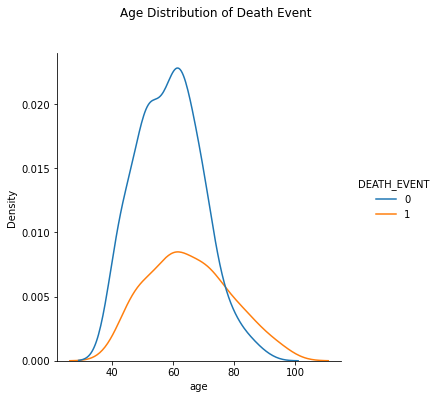

In [39]:
age_death=sns.displot(data=df, x="age", hue="DEATH_EVENT",kind="kde")
age_death.fig.suptitle("Age Distribution of Death Event",y=1.10)

In [40]:
df.groupby("DEATH_EVENT")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.758621,10.637402,40.0,50.0,60.0,65.0,90.0
1,96.0,65.208333,13.217147,42.0,55.0,65.0,75.0,95.0


- The age distribution of deceased patients is pretty wide.
- The younger patients are more likely to survive

# Serum_creatinine

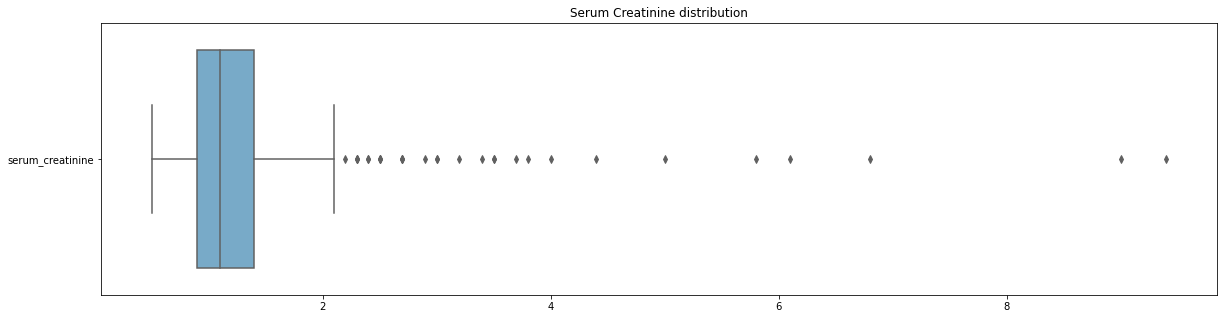

In [41]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["serum_creatinine"]],palette="Blues",orient='h')
plt.title("Serum Creatinine distribution")
plt.show()

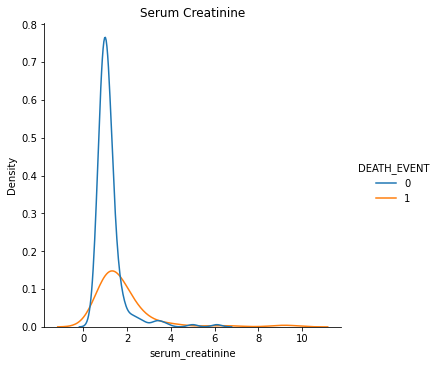

In [42]:
sns.displot(data=df, x="serum_creatinine", hue="DEATH_EVENT",kind="kde")
plt.title("Serum Creatinine")
plt.show()

In [43]:
df.groupby("DEATH_EVENT")["serum_creatinine"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,1.184877,0.654083,0.5,0.900,1.0,1.2,6.1
1,96.0,1.835833,1.468562,0.6,1.075,1.3,1.9,9.4


- The survivors serum creatinine level is around the median 1.0
- The deceased patients serum creatinine level are ofter higher than 1.3
- Some deceased patients are the highest serum creatine level

## Ejection Fraction

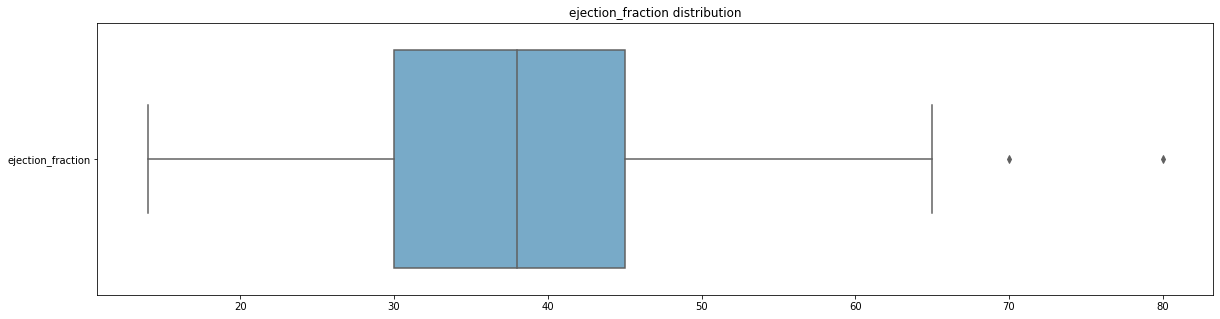

In [44]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["ejection_fraction"]],palette="Blues",orient='h')
plt.title("ejection_fraction distribution")
plt.show()

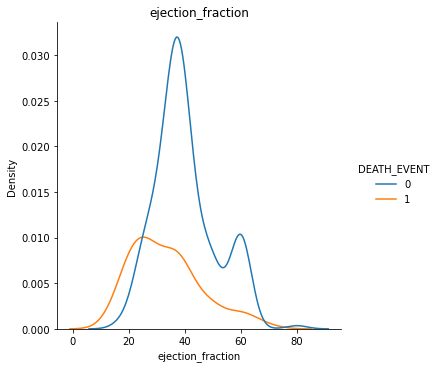

In [45]:
sns.displot(data=df, x="ejection_fraction", hue="DEATH_EVENT",kind="kde")
plt.title("ejection_fraction")
plt.show()

In [46]:
df.groupby("DEATH_EVENT")["ejection_fraction"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,40.26601,10.859963,17.0,35.0,38.0,45.0,80.0
1,96.0,33.46875,12.525303,14.0,25.0,30.0,38.0,70.0


- Majority of surviving patient have ejection_fraction level are mostly at 38 and 60
- Majority of deceased patients have ejection_fraction level lower than 30

## Serum_sodium

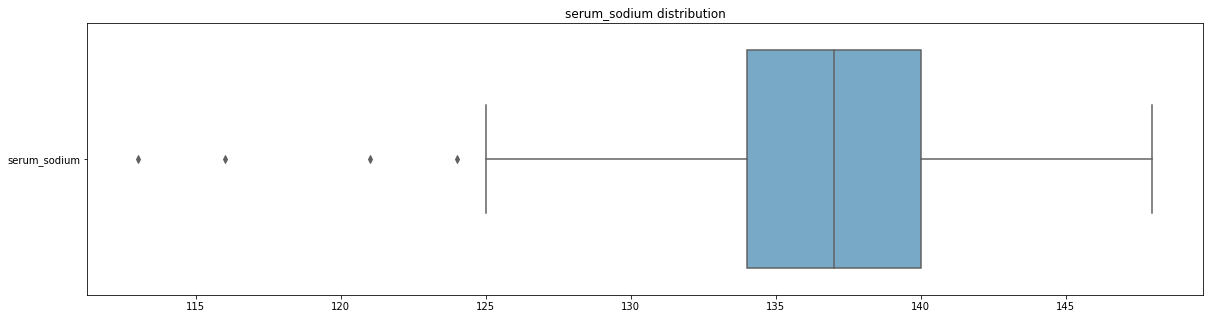

In [47]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["serum_sodium"]],palette="Blues",orient='h')
plt.title("serum_sodium distribution")
plt.show()

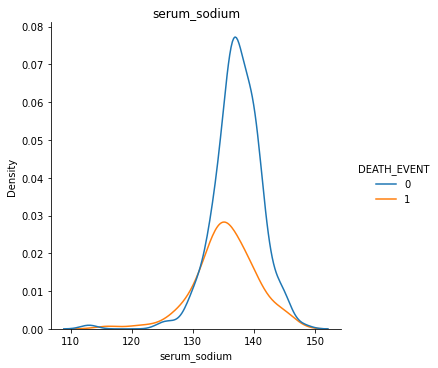

In [48]:
sns.displot(data=df, x="serum_sodium", hue="DEATH_EVENT",kind="kde")
plt.title("serum_sodium")
plt.show()

In [49]:
df.groupby("DEATH_EVENT")["serum_sodium"].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,137.216749,3.982923,113.0,135.5,137.0,140.00,148.0
1,96.0,135.375000,5.001579,116.0,133.0,135.5,138.25,146.0


- The serum sodium level is very wide for deceased patients
- The serium sodium level for survivors are clustered around 137

# time

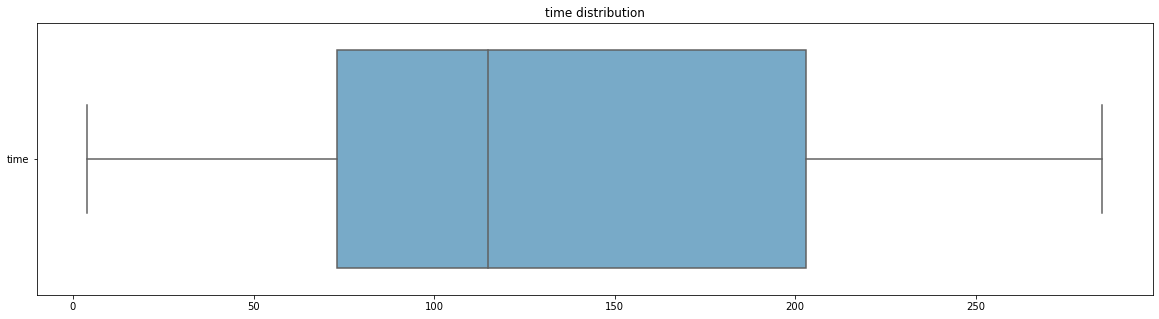

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))
ax=sns.boxplot(data=df[["time"]],palette="Blues",orient='h')
plt.title("time distribution")
plt.show()

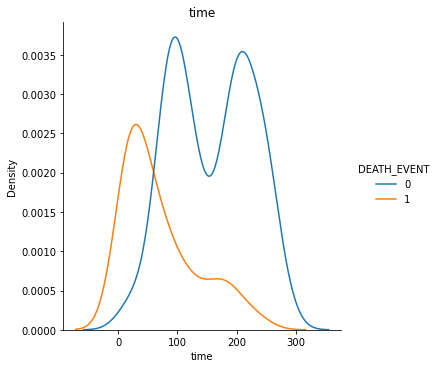

In [51]:
sns.displot(data=df, x="time", hue="DEATH_EVENT",kind="kde")
plt.title("time")
plt.show()

- The deceased patients tend to have less follow up time compared to surviving patients follow up time